In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
dataset = pd.read_csv('advertising_sales_data.csv')

**Checking for Missing Values**

In [60]:
dataset.isna().sum() #radio has 2 missing values

Campaign     0
TV           0
Radio        2
Newspaper    0
Sales        0
dtype: int64

In [87]:
dataset['Radio'].describe()


count    200.000000
mean      23.252000
std       14.846988
min        0.000000
25%        9.975000
50%       22.400000
75%       36.525000
max       49.600000
Name: Radio, dtype: float64

In [88]:
dataset['Radio'].median()

22.4

Filling NAN in Radio Column with Median

In [62]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy = 'median')
dataset['Radio'] = imputer.fit(dataset[['Radio']]).transform(dataset[['Radio']])
dataset.isna().sum() #radio has 0 missing values now


Campaign     0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

**Q1: Average Money spent on TV Advertising**

In [93]:
dataset['TV'].mean()


23.252

**Q2: Correlation between Radio Advertising Expenditure and Sales**

In [64]:
radio_advertising = dataset.iloc[:,2]
sales = dataset.iloc[:,3]
#First visualise the relation using linear regressor
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(radio_advertising.values.reshape(-1,1),sales.values.reshape(-1,1))


LinearRegression()

Text(0, 0.5, 'Sales')

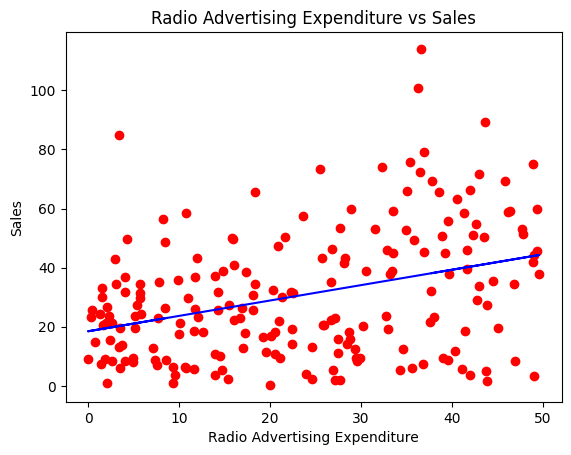

In [65]:
plt.scatter(radio_advertising.values, sales.values, color = 'red')
plt.plot(radio_advertising.values, regressor.predict(radio_advertising.values.reshape(-1,1)), color = 'blue')
plt.title('Radio Advertising Expenditure vs Sales')
plt.xlabel('Radio Advertising Expenditure')
plt.ylabel('Sales')


In [66]:
correlation = dataset['Radio'].corr(dataset['Sales'])
print(correlation) #weak positive correlation

0.3495931347494022


**Q3: Which advertising medium affects product sales the most**

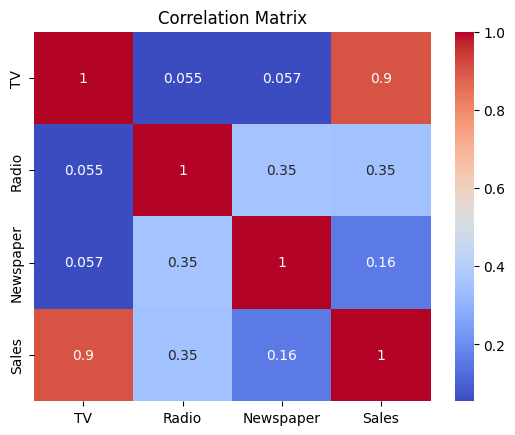

In [67]:
import seaborn as sns

correlation_matrix = dataset.iloc[:,1:].corr()
sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show() #TV expenditures affects sales the highest

**Q4: Linear Regression Model to Predict Sales**

In [80]:
features = dataset.iloc[:,1:4].values
target = dataset.iloc[:,4].values

from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.2, random_state=1 )

In [81]:
regressor.fit(features_train, target_train)
target_pred = regressor.predict(features_test)

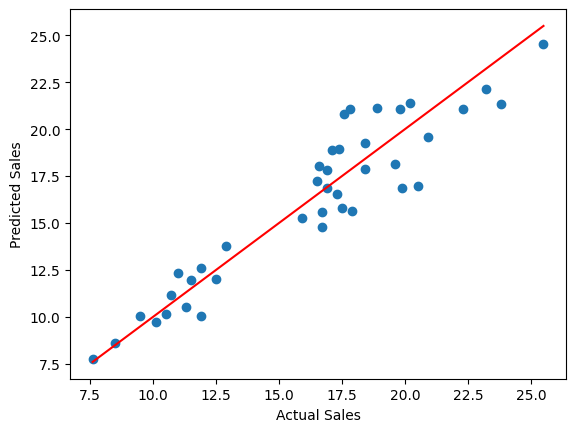

In [82]:
plt.scatter(target_test,target_pred) #plotting actual sales vs predicted sales from model
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.plot([min(target_test), max(target_test)], [min(target_test), max(target_test)], color='red') #plotting line of slope 1 to show accuracy of predictions
plt.show() #graph indicates good performance

In [83]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(target_test, target_pred)
print(mse)

2.4090380324614875


In [84]:
from sklearn.metrics import r2_score
r2 = r2_score(target_test, target_pred)
print(r2)

0.8747379983699565


**Both Mean Squared Error and R-squared score indicate high accuracy in the model**

**Q5: Prediction**

In [73]:
new_feature = np.array([200,40,50])
new_feature = new_feature.reshape(1,-1)
predicted_sales = regressor.predict(new_feature)
print(predicted_sales)
#predicted sales is around 20


[19.73359364]


**Q6: Will normalisation of feature data affect model accuracy?**

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_train_normalised = scaler.fit_transform(features_train)
features_test_normalised = scaler.transform(features_test) #we only fit train data to scaler to avoid data leakage


In [75]:
from sklearn.metrics import r2_score, mean_squared_error
regressor.fit(features_train_normalised, target_train)
target_pred = regressor.predict(features_test_normalised)
r2_score_normalised = r2_score(target_test, target_pred)
msr = mean_squared_error(target_test, target_pred)
print(r2_score_normalised,msr ) #normalising the data has produced no change in the accuracy of the regression model
#this happens because the features used are all in the same units(currency)

0.8747379983699565 2.409038032461486


**Q7: Excluding TV expenditure from model to test accuracy**

In [89]:
new_features = dataset.iloc[:,2:4].values
target = dataset.iloc[:,4].values

from sklearn.model_selection import train_test_split
new_features_train, new_features_test, target_train, target_test = train_test_split(new_features, target, test_size = 0.2, random_state=1 )

In [90]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(new_features_train, target_train)
target_pred = regressor.predict(new_features_test)


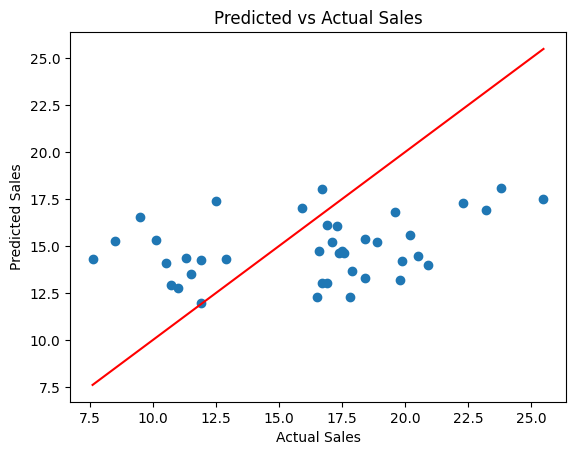

In [91]:
plt.scatter(target_test,target_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Predicted vs Actual Sales')
plt.plot([min(target_test), max(target_test)], [min(target_test), max(target_test)], color='red') #plotting line of slope 1 to show accuracy of predictions


In [92]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score_new = r2_score(target_test, target_pred)
msr_new = mean_squared_error(target_test, target_pred)
print(r2_score_new, msr_new) #very poor accuracy

0.007974419837317837 19.078629757528823
